<!-- <figure>
        <img src="https://z-p3-scontent.fpnh18-1.fna.fbcdn.net/v/t39.30808-6/471556574_630031189358594_2122222651865019678_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeHsrx7Qr2HiNhmyAL2CARaGySZRkOflcw_JJlGQ5-VzDyghWShBffS7LcUEgG55H4poyI2scm0AwI5jCFvnloYz&_nc_ohc=oUa66d5s7L4Q7kNvgEQ-FLJ&_nc_oc=AdhPrIfKRCIMl7rrnvvF_B9o1mbyQrp7c6G77_uGnPbZiVTs78GIWPCyLb3GN7b8CoU&_nc_zt=23&_nc_ht=z-p3-scontent.fpnh18-1.fna&_nc_gid=Au41WJ3JvesZcfXpnhuJDpX&oh=00_AYDlMqBWmbD6X_8Z7om7GM2h84WbQOXmypXjqQFcP-wVjg&oe=6778111A" alt ="Audio Art" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;">
        <figcaption>
            Source: <a href="https://z-p3-scontent.fpnh18-1.fna.fbcdn.net/v/t39.30808-6/471556574_630031189358594_2122222651865019678_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeHsrx7Qr2HiNhmyAL2CARaGySZRkOflcw_JJlGQ5-VzDyghWShBffS7LcUEgG55H4poyI2scm0AwI5jCFvnloYz&_nc_ohc=oUa66d5s7L4Q7kNvgEQ-FLJ&_nc_oc=AdhPrIfKRCIMl7rrnvvF_B9o1mbyQrp7c6G77_uGnPbZiVTs78GIWPCyLb3GN7b8CoU&_nc_zt=23&_nc_ht=z-p3-scontent.fpnh18-1.fna&_nc_gid=Au41WJ3JvesZcfXpnhuJDpX&oh=00_AYDlMqBWmbD6X_8Z7om7GM2h84WbQOXmypXjqQFcP-wVjg&oe=6778111A">[See Picture]</a>
        </figcaption>
</figure> -->

# **Type 2 Diabetes classification**

In the project, we try to predict if a patient has **type 2 diabetes** based on some features which are used as input information.

**[Dataset for Type 2 Diabetes](https://data.mendeley.com/datasets/7m7555vgrn/1)** provides comprehensive information on **5,437 patients**, including **14 independent** attributes such as demographics, clinical parameters, and medical history.

**<u>Key features:</u>**

- `age`

- `gender`

- `pulse rate`

- `blood pressure` (systolic and diastolic)

- `glucose level`

- `BMI`

- family history of diabetes and related conditions like `hypertension` and `cardiovascular` disease.

The dataset is labeled with a **binary outcome** indicating whether each patient has diabetes

**Import Libraries**

In [35]:
import pandas as pd # pandas for data analysis
import numpy as np  # numpy for complex numerical computation
import matplotlib.pyplot as plt # for initial plot
import seaborn as sns # built above matplotlib for making fancy plot
sns.set_theme() # set default for graphical plots

import warnings # compress error warnings

# compress the errors
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings
    # Your code that may generate warnings goes here

print('Tools Set Up')

Tools Set Up


**Load the Data**

In [36]:
df_raw = pd.read_csv('../selected_dataset/DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction/Diabetes_Final_Data_V2.csv')

**Copy Raw Data**

In [104]:
df = df_raw.copy()
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


## **I. Exploratory Data Analysis**

## **1.1. Data Cleaning**

### **1.1.1. Check Variables and Data Type**

**Check Columns**

In [38]:
print(df.columns)

Index(['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose',
       'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke', 'diabetic'],
      dtype='object')


**Note:** Above are the columns of the data.

**Data Type**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

**Note:** The data's columns are mixed of `numerical date`, `numerical categories`, and even `string categories`

### **1.1.1. Check Missing Data**

In [40]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

**Note:** No missing data since it is already cleaned

### **1.1.2. Check Diplicated Data**

In [41]:
df.duplicated().sum()

np.int64(0)

**Note:** No Duplicated Data as per the same reason

## **1.2. Summury Statistcs**

In [42]:
df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,45.533750,76.768990,133.859849,82.064742,7.540682,1.548571,53.626816,22.472301,0.037337,0.109803,0.039544,0.011587,0.003678
std,14.321155,12.290076,22.293015,12.489593,2.923080,0.080955,10.091550,8.778764,0.189603,0.312673,0.194903,0.107029,0.060545
min,8.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.700000,19.630000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.920000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.120000,1.600000,59.900000,24.490000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:** Based on the statistics sammary, `bmi` is quite *right-skewed* among all the numerical data

## **1.3. Data Visualization and Feature Selection**

In [43]:
count_in_diabetes = df['diabetic'].value_counts()
print(count_in_diabetes)

diabetic
No     5093
Yes     344
Name: count, dtype: int64


**Count Plots Diabetes Diagnos**

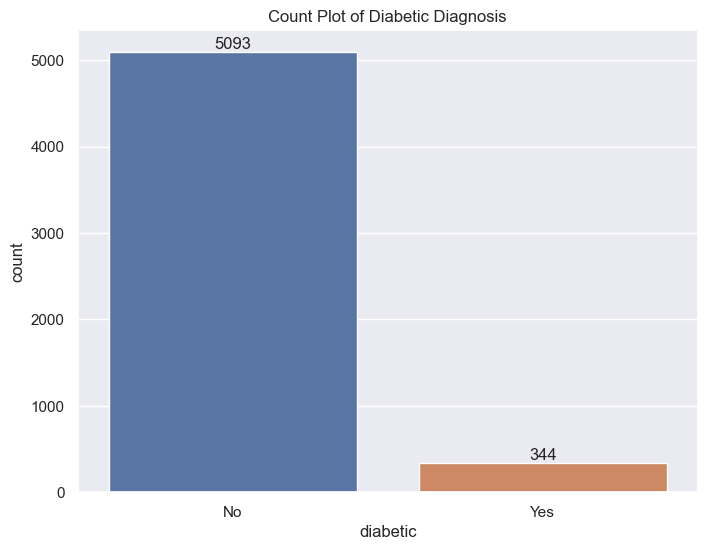

In [106]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", data=df, hue='diabetic')
plt.title("Count Plot of Diabetic Diagnosis")

def put_numbers_on_bar():
    ax = plt.gca()
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')


put_numbers_on_bar()

**Note:**

In here, are numbers of those who are Diabetic and those who are NOT, relative to all the records

**Donut Plot Diabetes Diagnos**

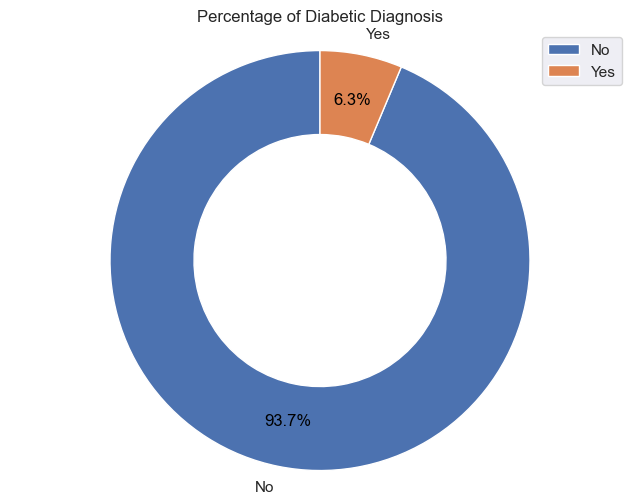

In [45]:
# get data for donut plot
labels = count_in_diabetes.index
sizes = count_in_diabetes.values

plt.figure(figsize=(8, 6))

# Create the donut chart  
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%',   
                                    startangle=90, wedgeprops=dict(width=0.4))  

# Set the position of the text annotations  
for text in autotexts:  
    text.set_color('black')  # Change the text color for better visibility  
    text.set_fontsize(12)  # Adjust font size  
    text.set_position((text.get_position()[0] * 1.3, text.get_position()[1] * 1.3))  

# Equal aspect ratio ensures that pie is drawn as a circle  
plt.legend()  
plt.title("Percentage of Diabetic Diagnosis")  
plt.axis('equal')  
plt.show()

**Note:** 

In here, i'm trying to illustrate the percentage of those who are Diabetic and those who are NOT relatively to all the records

The classes are inbalanced; let's save it for later discussion in the next section of *Model Contructions*

**Diabetic diagnos by `Gender`**

In [46]:
# print diabetes and nonp
diabetic_male = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Male')].shape[0]
diabetic_female = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Female')].shape[0]

non_diabetic_male = df[(df['diabetic'] == 'No') & (df['gender'] == 'Male')].shape[0]
non_diabetic_female = df[(df['diabetic'] == 'No') & (df['gender'] == 'Female')].shape[0]


df_diabetes_gender = pd.DataFrame({
    'Gender' : ['male', 'female'],
    'Non-diabetic' : [non_diabetic_male, non_diabetic_female],
    'Diabetic' : [diabetic_male, diabetic_female],
})
df_diabetes_gender.set_index('Gender', inplace=True)

df_diabetes_gender

# diabetic_male

,Non-diabetic,Diabetic
Gender,,
male,1462,116
female,3631,228


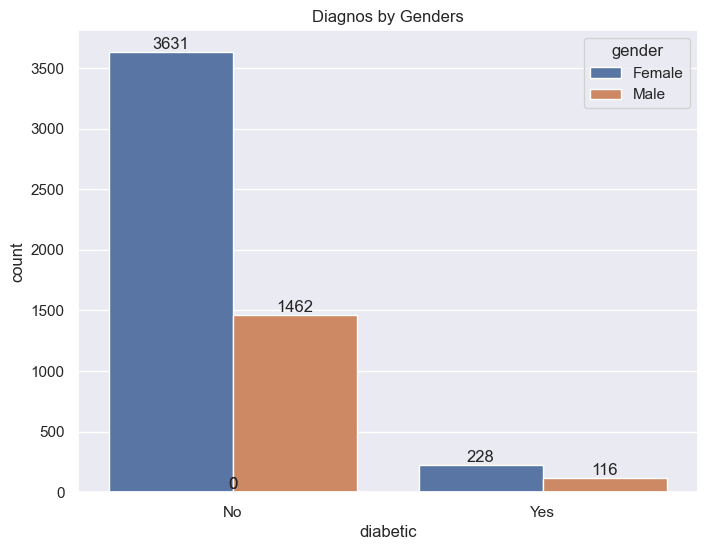

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", hue="gender", data=df)
plt.title("Diagnos by Genders")

put_numbers_on_bar()

**Note:**

From the plot, we can say that men are less likely to have DIABETES than women. 

**Histgram of Numerical Data**

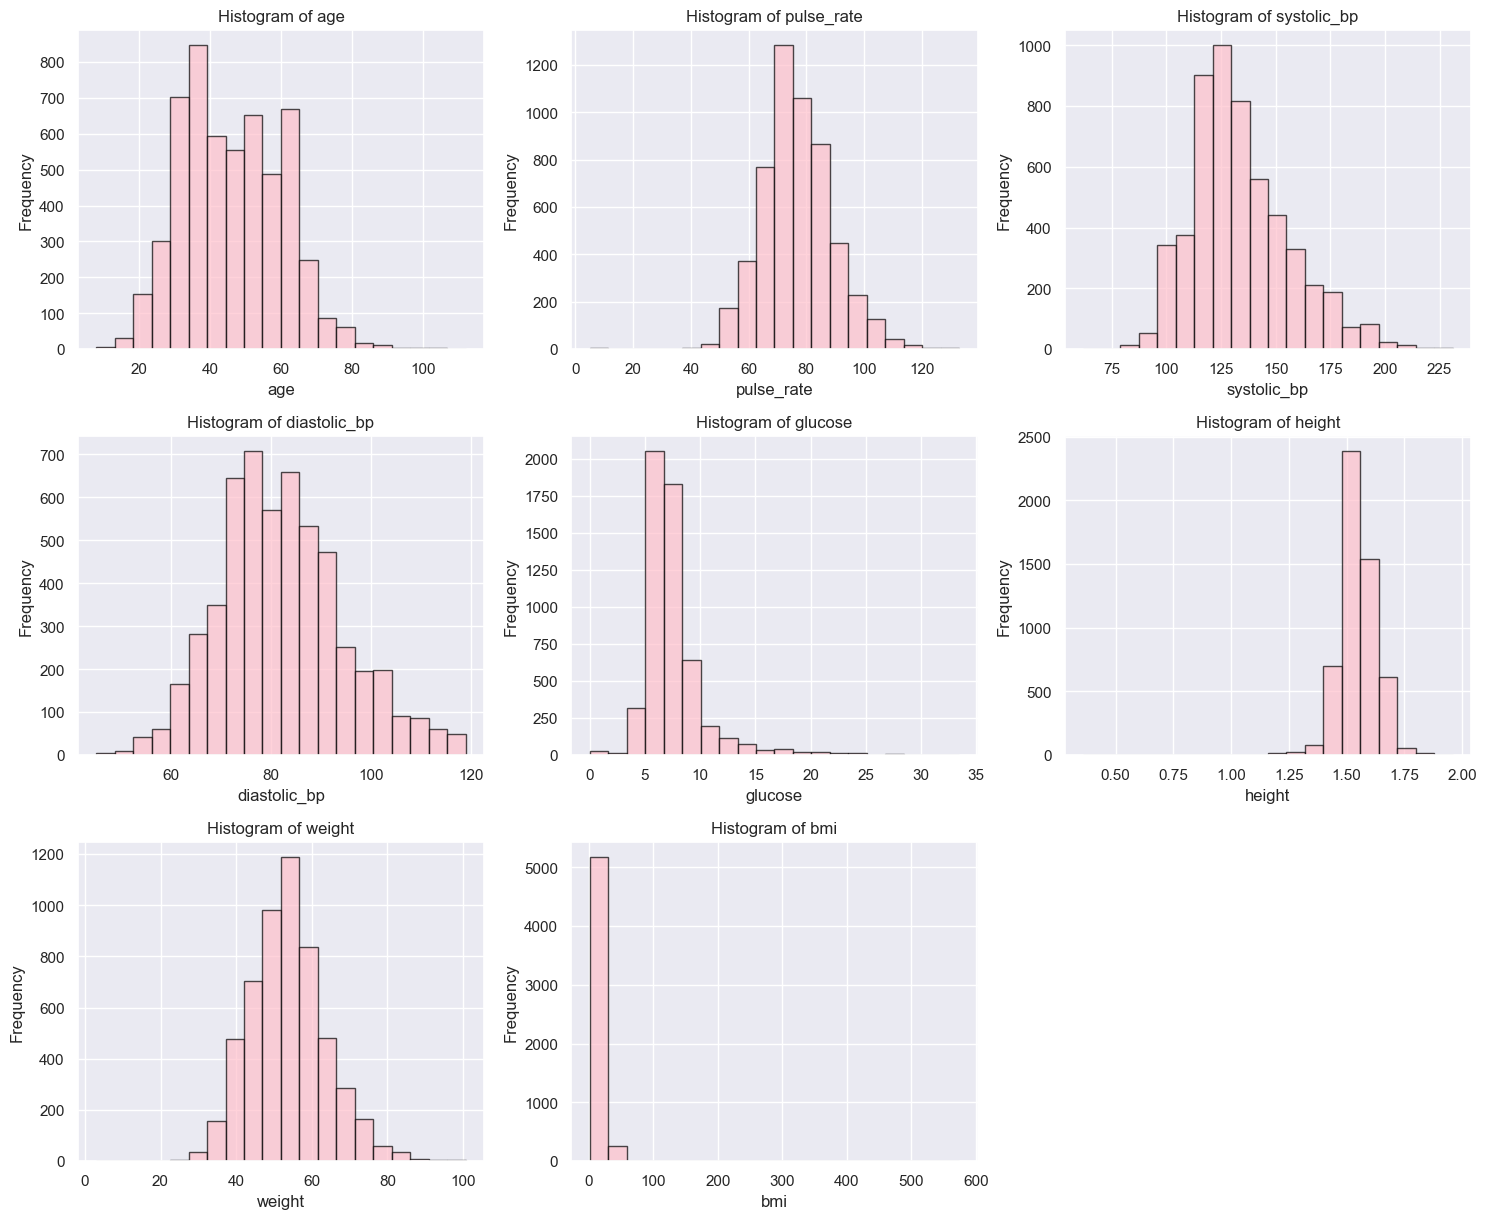

In [48]:
# columns of data we wanna plot histogram
numerical_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height', 'weight', 'bmi']

# function for numerical histogram plots
def plot_numerical_histogram(df: pd.DataFrame, cols, bins=20) -> None:
    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 2) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a histogram
    for i, column in enumerate(cols):
        axes[i].hist(df[column], bins=bins, color="pink", alpha=0.7, edgecolor="black")
        axes[i].set_title(f"Histogram of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_numerical_histogram(df, numerical_columns)

**Note:** As already said, the `bmi` is right-skewed

**Plot histgram of `BMI`**

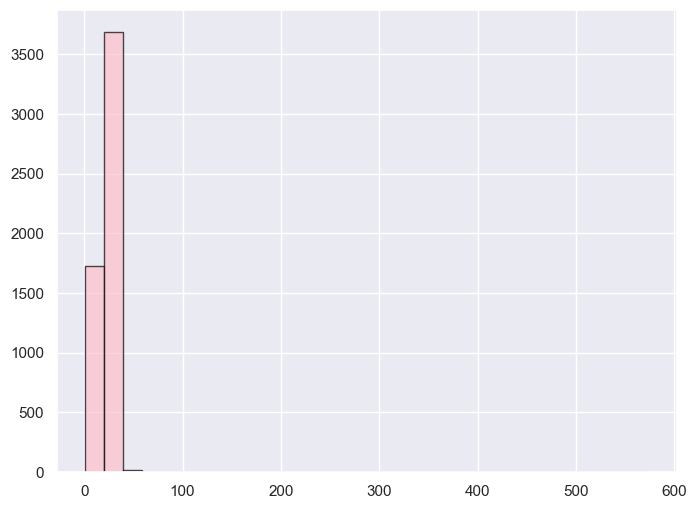

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=30, color="pink", alpha=0.7, edgecolor="black")
plt.show()

## **1.3.1. Data Trasformation**

**Label Encoding**

Because machine knows only numbers, we thus need to represent all string data with some sorts of arbitrary numbers

Label `Gender`: `Male` : 0, `Female` : 1

Label: `Diabetic`: `No` : 0,  `Yes` : 1

In [50]:
# label tthe gender column
gender_label_mapping = {
    'Female' : 0,
    'Male'   : 1,
}
df['gender'] = df['gender'].map(gender_label_mapping)

# label tthe target column
diabetic_label_mapping = {
    'Yes' : 1,
    'No'  : 0,
}
df['diabetic'] = df['diabetic'].map(diabetic_label_mapping)

df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0



**Drop Unnecessary Columns**

**Note**

Body mass index (BMI) is a value derived from the mass (weight) and height of a person ([Wikipedia](https://en.wikipedia.org/wiki/Body_mass_index#:~:text=The%20BMI%20is%20a%20convenient,obese%20(30%20or%20more))). Thus, technically, BMI alone can discribe of the two varibles.

$$bmi = \frac{weight}{height^2}$$

By that, dropping `height` and `weight` is recommended in terms of *Dimensional Reduction* or *Redundancy Reduction*

In [51]:
# copy the data from the original data
df_dropped = df.copy()
# drop the height and weight columns
df_dropped = df_dropped.drop(['height', 'weight'], axis=1)
df_dropped  # it is the original data without height and weight columns

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,17.79,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,1,83,164,89,6.47,24.99,0,1,0,1,0,0
5433,75,1,67,141,104,8.31,22.75,0,0,0,0,0,1
5434,40,0,67,134,114,7.61,30.72,0,1,0,0,1,0
5435,36,0,62,139,80,4.90,17.87,0,0,0,0,0,0


## **1.3.2. Checking and Clearing Outlier**

**Plot box plots**

Normally, we often check outliers of only `numerical data`

In [52]:
# numerical columns
numerical_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

**Plot box plots of numerical data**

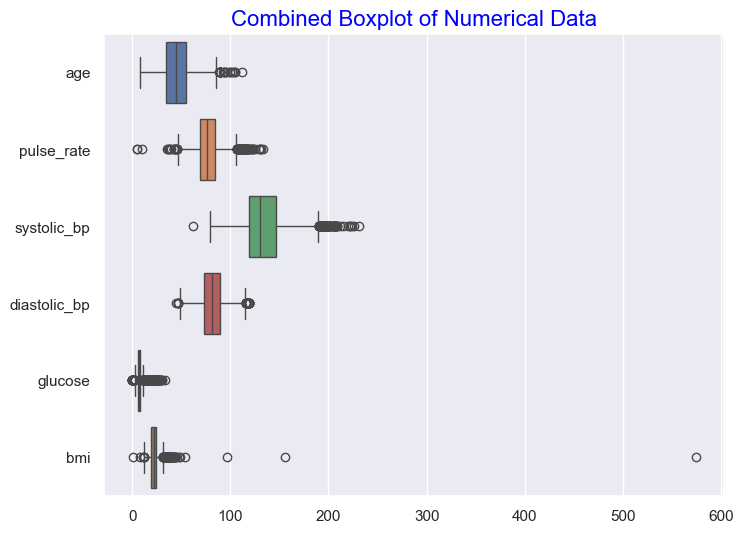

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_dropped[numerical_columns], orient='h')
plt.title("Combined Boxplot of Numerical Data", fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

**Function to plot boxplots**

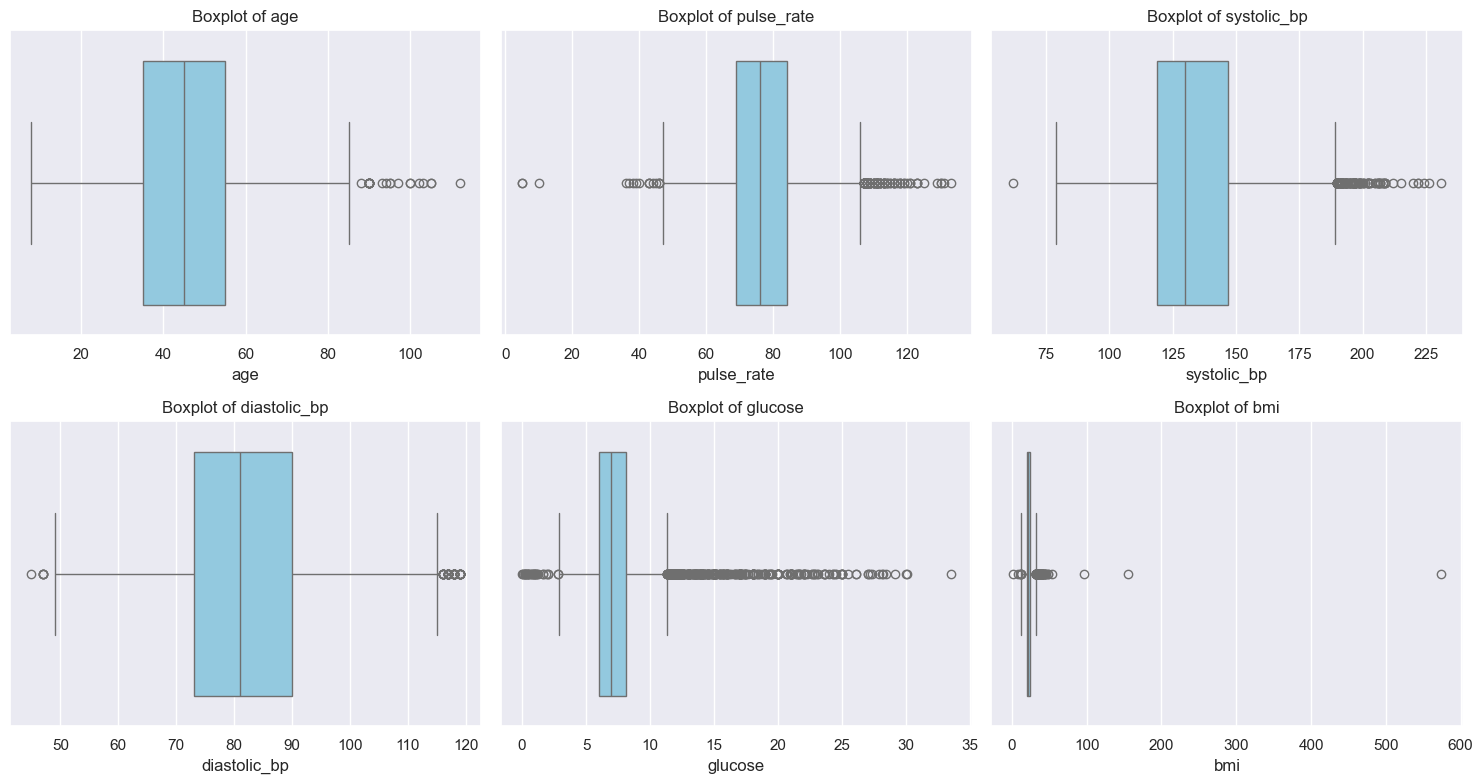

In [54]:
def plot_numerical_boxplot(df: pd.DataFrame, cols) -> None :

    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a boxplot
    for i, column in enumerate(cols):
        sns.boxplot(data=df[column], ax=axes[i], color="skyblue", orient="h")
        axes[i].set_title(f"Boxplot of {column}")
        axes[i].set_xlabel(column)
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_numerical_boxplot(df_dropped, numerical_columns)

**Clear Outliers by Columns**

In [55]:
# define function to clear outliers given one column
def clear_outliers_iqr(df: pd.DataFrame, column:str) -> pd.DataFrame:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    return df


# define function to clear outliers given multiple columns
def clear_outliers_iqr_multiple(df: pd.DataFrame, cols:list) -> pd.DataFrame:
    for col in cols:
        df = clear_outliers_iqr(df, col)
    return df


# note: the below funtion will remove the outliers only in the numerical columns;
# thus, it will not affect the target column and cattegorical columns

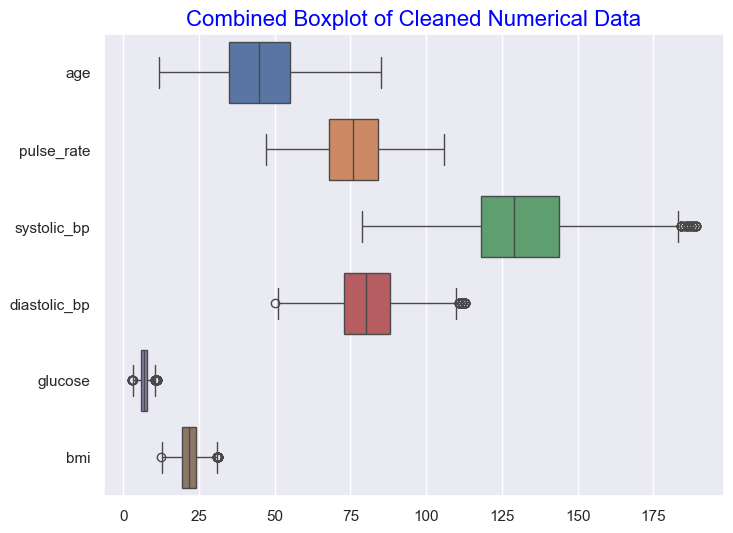

In [56]:
# new df after clearing outliers
df_cleaned_numerical = clear_outliers_iqr_multiple(df_dropped, numerical_columns)[numerical_columns].copy()
# df = clear_outliers_iqr_multiple(df, cols)

# plot the boxplot of the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned_numerical, orient='h')
plt.title("Combined Boxplot of Cleaned Numerical Data", fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

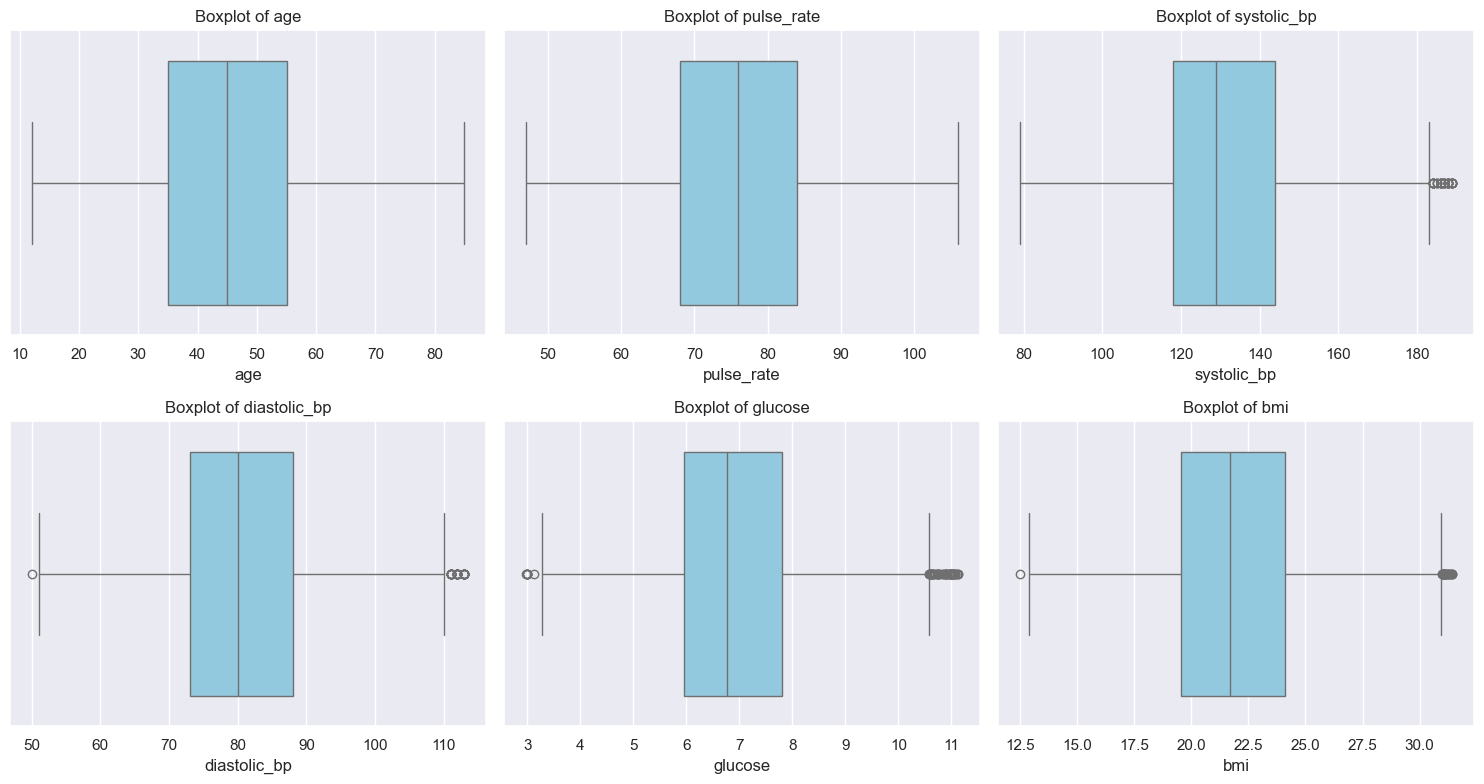

In [57]:
plot_numerical_boxplot(df_cleaned_numerical, numerical_columns)

**Plot box plots and violin plots**

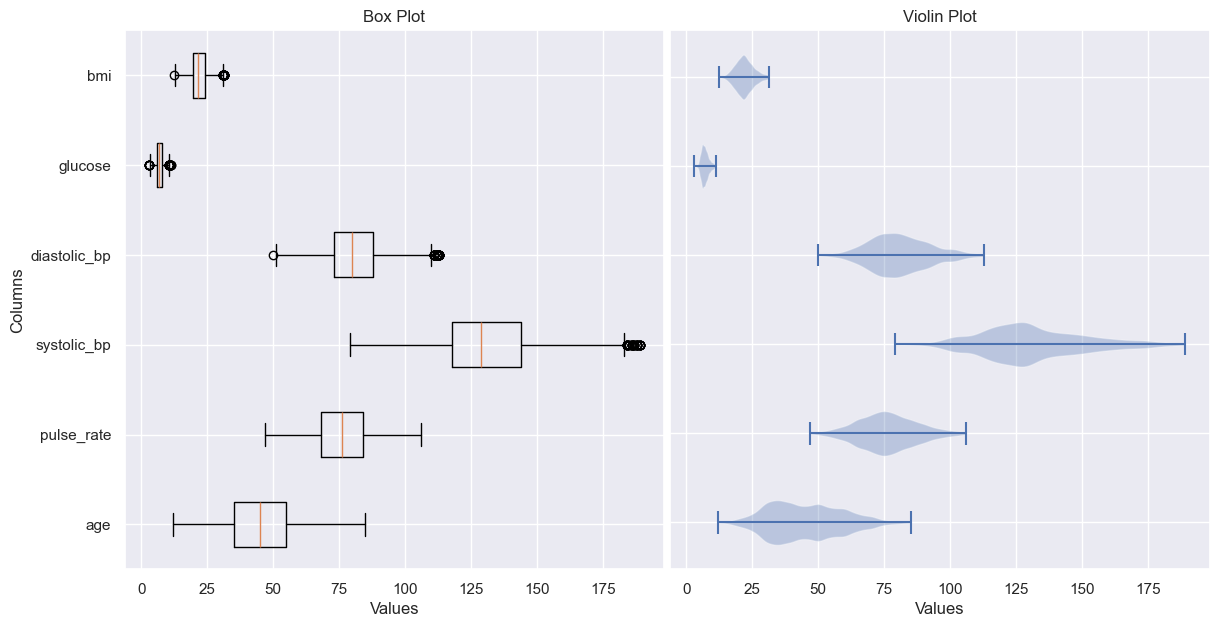

In [58]:
# Create subplots of distribution: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Box Plot on the first subplot
axs[0].boxplot(df_cleaned_numerical, vert=False)
axs[0].set_title('Box Plot')
axs[0].set_ylabel('Columns')
axs[0].set_xlabel('Values')
axs[0].set_yticklabels(numerical_columns)

# Violin Plot on the second subplot
axs[1].violinplot(df_cleaned_numerical, vert=False)
axs[1].set_title('Violin Plot')
axs[1].set_xlabel('Values')
axs[1].set_yticklabels([])

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=.01)
# plt.tight_layout()

# Show the plots
plt.show()

In [59]:
# new df after clearing outliers
df_1 = clear_outliers_iqr_multiple(df_dropped, numerical_columns)
df_1

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,20.24,0,0,0,0,0,0
4,68,0,71,150,81,5.71,17.79,0,0,0,0,0,0
5,40,1,48,131,73,7.22,23.42,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,70,1,68,146,77,9.42,18.35,0,1,0,1,0,0
5432,74,1,83,164,89,6.47,24.99,0,1,0,1,0,0
5433,75,1,67,141,104,8.31,22.75,0,0,0,0,0,1
5435,36,0,62,139,80,4.90,17.87,0,0,0,0,0,0


In [60]:
# sns.pairplot(df[['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'diabetic']], hue='diabetic')
# plt.show()

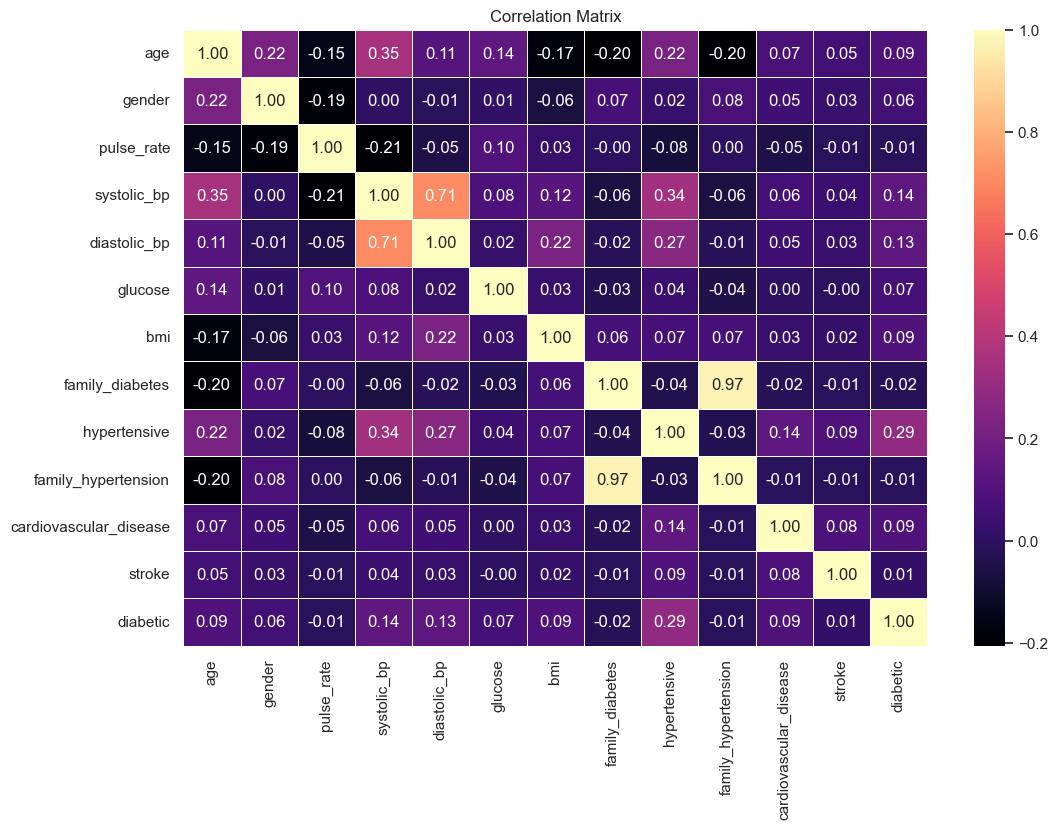

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Note:**

The CORRELATION of the features and target seem to be kinda poor..

# **2. Model Construction (Pending)**

## **2.2. Initial Model Test**

**Split Data**

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Separate features (X) and target (y)
X = df_1.drop('diabetic', axis=1)
y = df_1['diabetic']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Machine Learning time!!")

Machine Learning time!!


**Scaling the Data**

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# numerical features
numerical_features = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

# scale data
scaler = StandardScaler()

X_train_scaled =  X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test_scaled)

### **Logistic Regression**

Functions

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

# plot heatmap for confustion metrix
def plot_heatmap(y_test, y_pred, name:str) -> None:
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Reds", linewidth=.5)
    plt.title(f"Confusion Metrics for {name}", fontsize=15, fontweight='bold')
    plt.ylabel("Actual Classes")
    plt.xlabel("Predicted Classes")
    plt.show()

# function to print model performance report (for initial model evaluation)
def model_performance_report(model, X_train, X_test, y_train, y_test):

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # plot confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # return the model
    return model


# function to plot ROC and Print AUC
def plot_roc_and_print_auc(model, X_test, y_test):
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Create ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {auc:.4f}")

def model_performance(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # plot confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # plot the ROC curve and print AUC
    plot_roc_and_print_auc(model, X_test, y_test)
    
    # return the model
    return model

**For Normal Data**

Confusion Matrix:
[[889   2]
 [ 37   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.50      0.05      0.09        39

    accuracy                           0.96       930
   macro avg       0.73      0.52      0.54       930
weighted avg       0.94      0.96      0.94       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


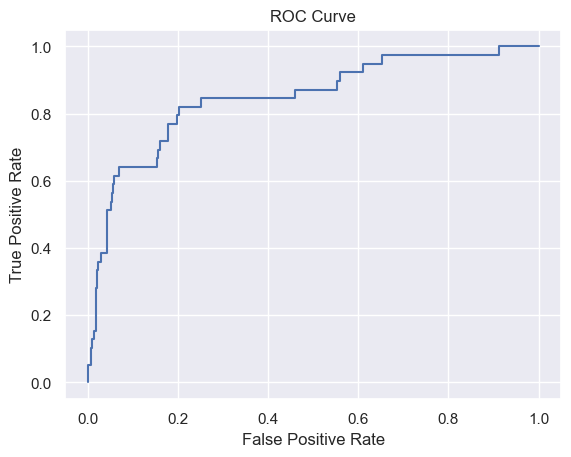

AUC: 0.8473


In [76]:
from sklearn.linear_model import LogisticRegression

model_lr_normal = model_performance(LogisticRegression(max_iter=200), X_train, X_test, y_train, y_test)

**For scaled data**

Confusion Matrix:
[[889   2]
 [ 37   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.50      0.05      0.09        39

    accuracy                           0.96       930
   macro avg       0.73      0.52      0.54       930
weighted avg       0.94      0.96      0.94       930



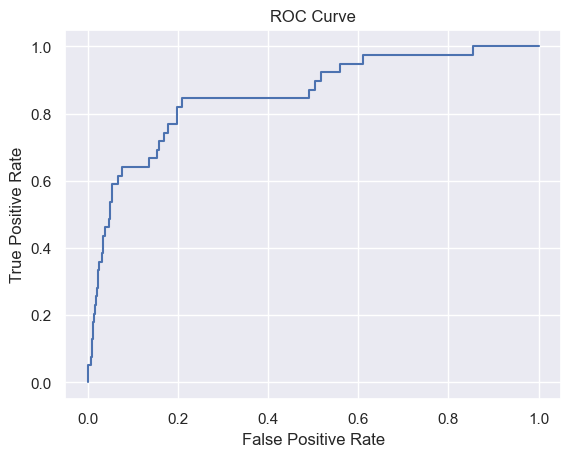

AUC: 0.8548


In [77]:
model_lr_scaled = model_performance(LogisticRegression(max_iter=200), X_train_scaled, X_test_scaled, y_train, y_test)

^^ The model, i.e. **Logistic Regression** is merely capable of predicting the those who are not diagnosed to have DIABETES; this is due to the fact that the classes are IMBALANCED

### **Random Forest**

**For normal data**

Confusion Matrix:
[[891   0]
 [ 39   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.00      0.00      0.00        39

    accuracy                           0.96       930
   macro avg       0.48      0.50      0.49       930
weighted avg       0.92      0.96      0.94       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

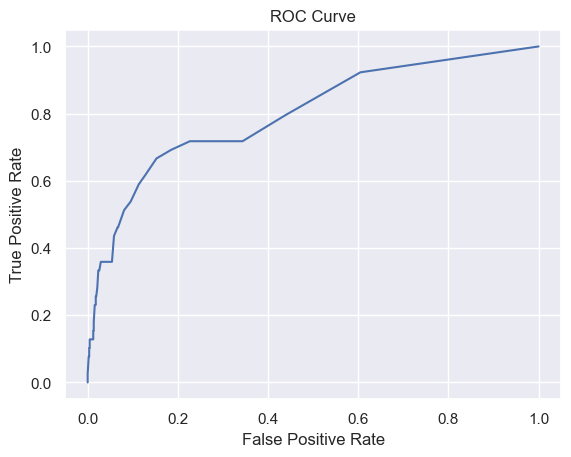

AUC: 0.7997


In [78]:
# import Random Forest Classifier from ensemble library in sklearn
from sklearn.ensemble import RandomForestClassifier

# train the model and print the performance report
model_rf_normal = model_performance(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

**For Scaled Data**

Confusion Matrix:
[[890   1]
 [ 39   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.00      0.00      0.00        39

    accuracy                           0.96       930
   macro avg       0.48      0.50      0.49       930
weighted avg       0.92      0.96      0.94       930



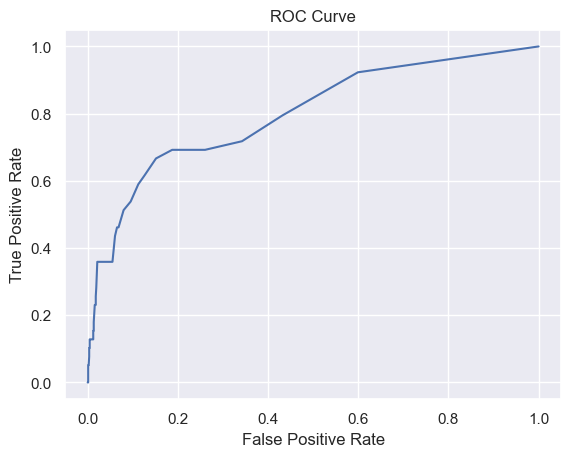

AUC: 0.7987


In [79]:
model_rf_scaled = model_performance(RandomForestClassifier(n_estimators=100, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)

### **SVM**

**For normal Data**

In [84]:
def roc_auc_score_for_svm(model, X_test, y_test) -> None:
    # Get the decision function scores
    y_scores = model.decision_function(X_test)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_scores)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()

Confusion Matrix:
[[891   0]
 [ 39   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.00      0.00      0.00        39

    accuracy                           0.96       930
   macro avg       0.48      0.50      0.49       930
weighted avg       0.92      0.96      0.94       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

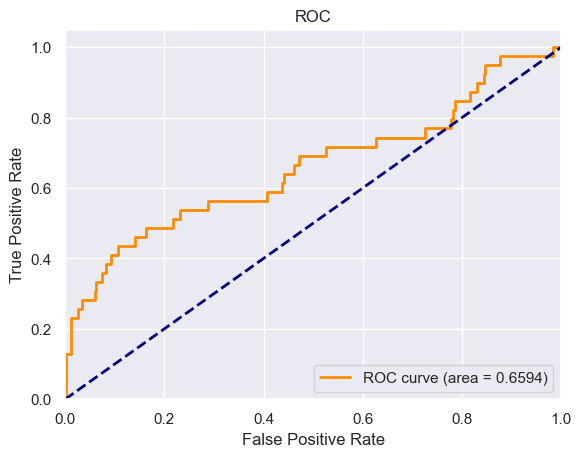

In [86]:
from sklearn.svm import SVC

# Create a support vector classifier
model_svc_normal = model_performance_report(SVC(), X_train, X_test, y_train, y_test)

# print roc and auc of svm
roc_auc_score_for_svm(model_svc_normal, X_test, y_test)

Based on ROC-AUC, though the classes are imbalance, Logistic R

**For scaled data**

Confusion Matrix:
[[891   0]
 [ 39   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       891
           1       0.00      0.00      0.00        39

    accuracy                           0.96       930
   macro avg       0.48      0.50      0.49       930
weighted avg       0.92      0.96      0.94       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

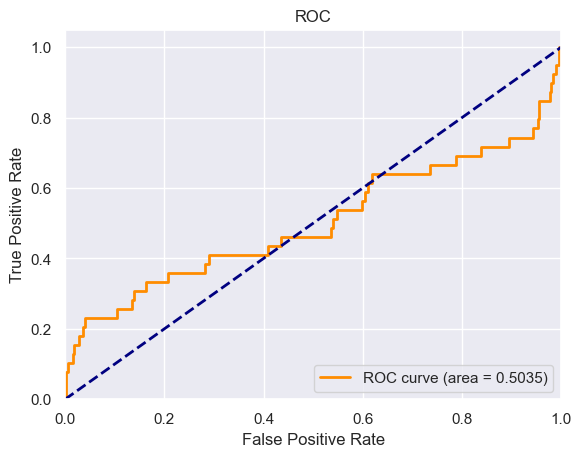

In [87]:
from sklearn.svm import SVC

# Create a support vector classifier
model_svc_scaled = model_performance_report(SVC(), X_train_scaled, X_test_scaled, y_train, y_test)

# print
roc_auc_score_for_svm(model_svc_scaled, X_test_scaled, y_test)

## **2.2. Dealing with Class IMBALANCE**

As you can see from above, the class inbalance is the major problem that make our models prone to MISCLASSIFICATION.

The methods to treat class imbalance are:

- Over-sampling

- Under-smapling

- Ensemble Learning

### **2.2.1. Over-sampling (Up-sampling)**

**Oversampling:** Increase the number of instances in the minority class (e.g., SMOTE).

In [95]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# scale the data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test)

### **Logistic**

**Normal**

Confusion Matrix:
[[638 253]
 [ 10  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       891
           1       0.10      0.74      0.18        39

    accuracy                           0.72       930
   macro avg       0.54      0.73      0.50       930
weighted avg       0.95      0.72      0.80       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


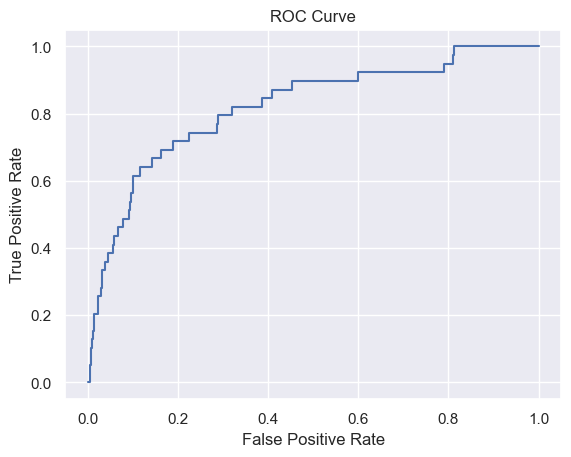

AUC: 0.8197


In [91]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
model_lr_up = model_performance(LogisticRegression(max_iter=200), X_train_resampled, X_test, y_train_resampled, y_test)

**Scaled**

Confusion Matrix:
[[648 243]
 [  9  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       891
           1       0.11      0.77      0.19        39

    accuracy                           0.73       930
   macro avg       0.55      0.75      0.51       930
weighted avg       0.95      0.73      0.81       930



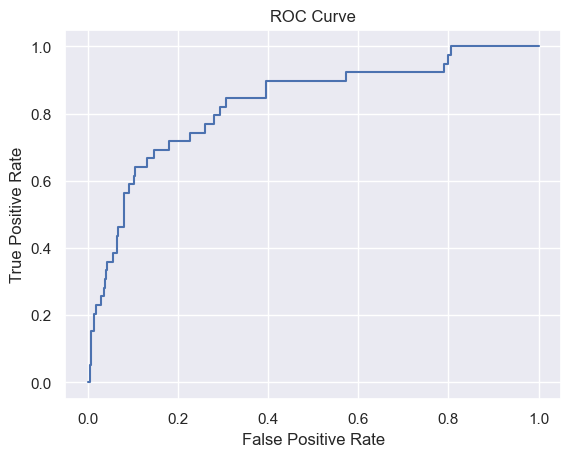

AUC: 0.8273


In [98]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
model_lr_up_scaled = model_performance(LogisticRegression(max_iter=200), X_train_resampled_scaled, X_test_resampled_scaled, y_train_resampled, y_test)

### **Random Forest**

Confusion Matrix:
[[838  53]
 [ 34   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       891
           1       0.09      0.13      0.10        39

    accuracy                           0.91       930
   macro avg       0.52      0.53      0.53       930
weighted avg       0.92      0.91      0.92       930



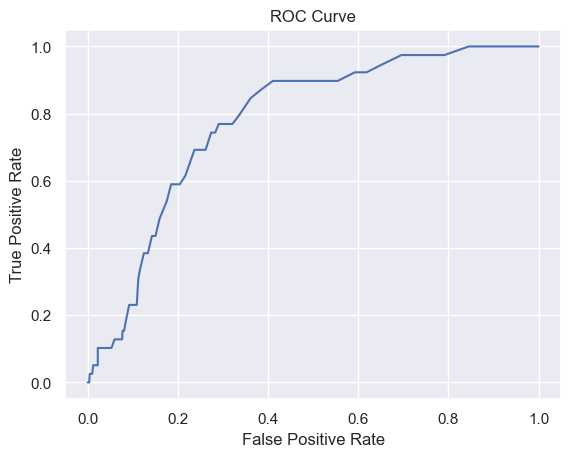

AUC: 0.7787


In [99]:
model_rf_up_scaled = model_performance(RandomForestClassifier(n_estimators=100, random_state=42), X_train_resampled_scaled, X_test_resampled_scaled, y_train_resampled, y_test)

### **SVM**

Confusion Matrix:
[[694 197]
 [ 17  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       891
           1       0.10      0.56      0.17        39

    accuracy                           0.77       930
   macro avg       0.54      0.67      0.52       930
weighted avg       0.94      0.77      0.84       930



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


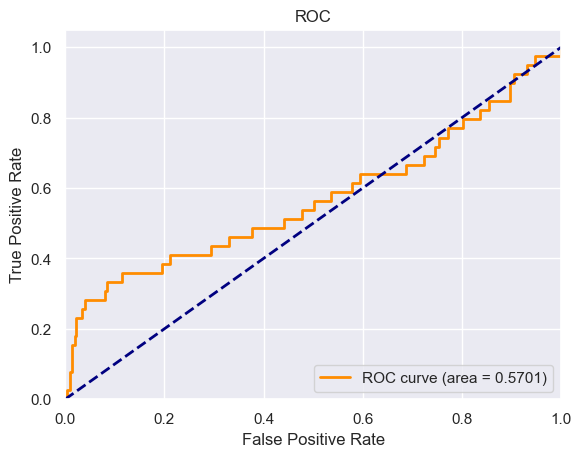

In [102]:
model_svc_up_scaled = model_performance_report(SVC(), X_train_resampled_scaled, X_test_resampled_scaled, y_train_resampled, y_test)

# print roc and auc of svm
roc_auc_score_for_svm(model_svc_normal, X_test_resampled_scaled, y_test)

### **2.2.2. Cost Sensitive Training (Penalize Algorithm)**

In [105]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Creating and training a BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(X_train_resampled_scaled, y_train_resampled)

# Making predictions on the test set
y_pred = clf.predict(X_test_resampled_scaled)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

ROC-AUC Score: 0.5483
Accuracy: 0.9097


### **2.2.4. Deep Learning**

### **Handling Class Imbalance in TensorFlow with Class Weight**

**Class Weights**

In [ ]:
import tensorflow as tf
from sklearn.utils import class_weight

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history_with_weights = model.fit(
    X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test), batch_size=32)

# Evaluate the model with class weights
loss_with_weights, accuracy_with_weights = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss with class weights: {loss_with_weights}")
print(f"Test Accuracy with class weights: {accuracy_with_weights}")

Epoch 1/50


d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8769 - loss: 0.5325 - val_accuracy: 0.9581 - val_loss: 0.2565
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.2176 - val_accuracy: 0.9581 - val_loss: 0.1582
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9640 - loss: 0.1458 - val_accuracy: 0.9581 - val_loss: 0.1431
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1445 - val_accuracy: 0.9581 - val_loss: 0.1389
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.1363 - val_accuracy: 0.9581 - val_loss: 0.1374
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1555 - val_accuracy: 0.9581 - val_loss: 0.1372
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1264 - val_accuracy: 0.9581 - val_loss: 0.1362
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.1271 - val_accuracy: 0.9581 - val_

**With Class weight**

In [115]:
# Train the model without class weights
history_no_weights = model.fit(
    X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test), batch_size=32)

# Evaluate the model without class weights
loss_no_weights, accuracy_no_weights = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss without class weights: {loss_no_weights}")
print(f"Test Accuracy without class weights: {accuracy_no_weights}")

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1143 - val_accuracy: 0.9570 - val_loss: 0.1479
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1088 - val_accuracy: 0.9559 - val_loss: 0.1479
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1185 - val_accuracy: 0.9559 - val_loss: 0.1486
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.1307 - val_accuracy: 0.9559 - val_loss: 0.1501
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9672 - loss: 0.1062 - val_accuracy: 0.9559 - val_loss: 0.1500
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1061 - val_accuracy: 0.9559 - val_loss: 0.1502
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1100 - val_accuracy: 0.9559 - val_loss: 0.1501
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1065 - val_accuracy: 0.

**Comparing Evaluation Metrics**

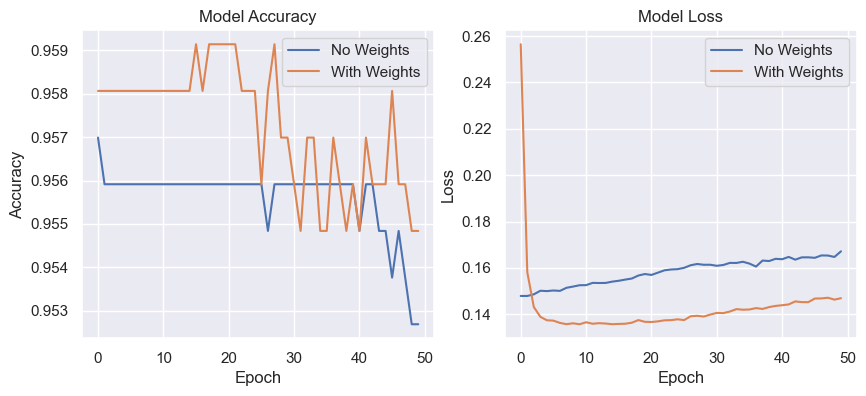

In [116]:
# Compare evaluation metrics
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_weights.history['val_accuracy'], label='No Weights')
plt.plot(history_with_weights.history['val_accuracy'], label='With Weights')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_weights.history['val_loss'], label='No Weights')
plt.plot(history_with_weights.history['val_loss'], label='With Weights')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
